# Pose in 3D
Similar to 2D case, the 3D has ortogonal and eucliean spaces. However, it has 3 different rotations and a translation. Let's first install required libraries.

In [60]:
!pip install spatialmath-python
!pip install ipywidgets

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


Now, import required modules

In [61]:
import numpy as np
from spatialmath import SO3, SE3

import ipywidgets as widgets
import matplotlib.pyplot as plt

## Rotation

Rotations in 3D can be represented by rotation matrices – 3x3 orthonormal matrices – which belong to the group $\mbox{SO}(3)$. These are a subset of all possible 3x3 real matrices.

We can create such a matrix, a rotation of $\pi/3$ radians around the x-axis by


In [62]:
#Let start with a rotation around X-axis
Rx = SO3.Rx(np.pi/3)

#we can print it just by type its name or by calling the global static method print
Rx
#print(Rx)

SO3:   1           0           0            
       0           0.5        -0.866025     
       0           0.866025    0.5          
    

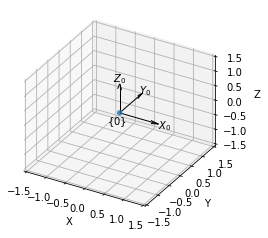

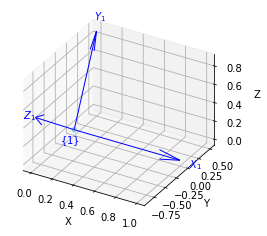

In [63]:
fig = plt.figure() # create a new figure
SE3().plot(frame='0', dims=[-1.5,1.5], color='black')
Rx.plot(frame='1')

If we consider the other axes, the rotations matrices can be constructed in a similar way. Moreover, there are other rotations conventions as the Euler's angle rotations, or that one used in aviation RPY (Roll, Pitch and Yaw). With any of the conventions an arbitrary rotation can be expresed as the composition of three rotations about different axes.

In [64]:
R2 = SO3.RPY([10, 20, 30], unit='deg')
# Matrix representation
R2
# 3-angle representation
#R2.rpy()

SO3:   0.813798   -0.44097     0.378522     
       0.469846    0.882564    0.0180283    
      -0.34202     0.163176    0.925417     
    



which says that we rotate by 30° about the Z-axis (yaw), then 20° about the Y-axis (pitch) and then 10° about the X-axis – this is the ZYX roll-pitch yaw convention. Note that:

   1. the first rotation in the sequence involves the last element in the angle sequence.
   2. we can change angle convention, for example by passing order='xyz'

We can visualize the resulting orientation.


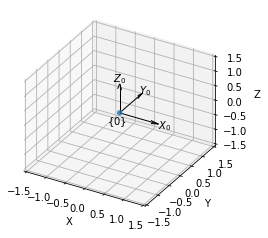

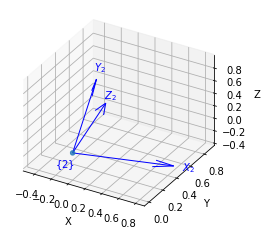

In [65]:
plt.figure() # create a new figure
SE3().plot(frame='0', dims=[-1.5,1.5], color='black')
R2.plot(frame='2')

## Representing position

In robotics we also need to describe the position of objects and we can do this with a homogeneous transformation matrix – a 4x4 matrix – which belong to the group $\mbox{SE}(3)$ which is a subset of all 4x4 real matrices.

We can create such a matrix, for a translation of 1 in the x-direction, 2 in the y-direction and 3 in the z-direction by


In [66]:
T1 = SE3(1, 2, 3)
T1

SE3:   1           0           0           1            
       0           1           0           2            
       0           0           1           3            
       0           0           0           1            
    

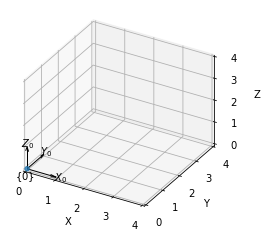

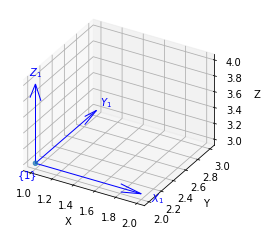

In [67]:
plt.figure() # create a new figure
SE3().plot(frame='0', dims=[0,4], color='black')
T1.plot(frame='1')

###Representing pose

The 3D pose is the transformation composed by a rotation followed by a translation as

In [68]:
T1 = SE3(1, 2, 3) * SE3.Rx(30, 'deg')
T1

SE3:   1           0           0           1            
       0           0.866025   -0.5         2            
       0           0.5         0.866025    3            
       0           0           0           1            
    

In [69]:
# The rotation component
T1.R

array([[ 1.       ,  0.       ,  0.       ],
       [ 0.       ,  0.8660254, -0.5      ],
       [ 0.       ,  0.5      ,  0.8660254]])

In [70]:
# The translation component
T1.t

array([1., 2., 3.])

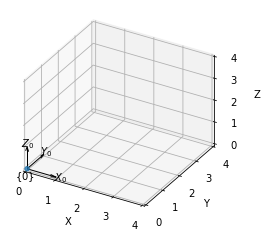

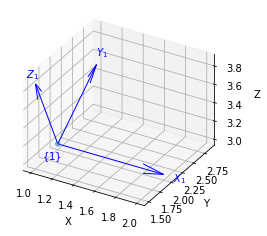

In [71]:
plt.figure() # create a new figure
SE3().plot(frame='0', dims=[0,4], color='black')
T1.plot(frame='1')

### Transforming points

Imagine now a set of points defining the vertices of a cube, and we want to transform it with T1

[[-1  1  1 -1 -1  1  1 -1]
 [-1 -1  1  1 -1 -1  1  1]
 [-1 -1 -1 -1  1  1  1  1]]
[[0.        2.        2.        0.        0.        2.        2.
  0.       ]
 [1.6339746 1.6339746 3.3660254 3.3660254 0.6339746 0.6339746 2.3660254
  2.3660254]
 [1.6339746 1.6339746 2.6339746 2.6339746 3.3660254 3.3660254 4.3660254
  4.3660254]]


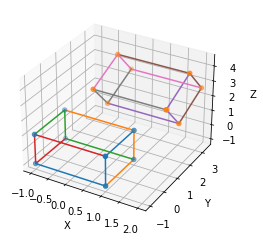

In [72]:
P = np.array([[-1, 1, 1, -1, -1, 1, 1, -1], [-1, -1, 1, 1, -1, -1, 1, 1], [-1, -1, -1, -1, 1, 1, 1, 1]])
print(P)
Q = T1 * P
print(Q)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')

lines = [[0,1,5,6], [1,2,6,7], [2,3,7,4], [3,0,4,5]]
# draw lines joining the vertices of P
ax.scatter(xs=P[0], ys=P[1], zs=P[2], s=20)  # draw vertices
for line in lines:
    ax.plot([P[0,i] for i in line], [P[1,i] for i in line], [P[2,i] for i in line])
# draw lines joining the vertices of Q
ax.scatter(xs=Q[0], ys=Q[1], zs=Q[2], s=20)  # draw vertices
for line in lines:
    ax.plot([Q[0,i] for i in line], [Q[1,i] for i in line], [Q[2,i] for i in line])
plt.show()


### Multi-valued objects

For many tasks we might want to have a set or sequence of rotations or poses. The pose objects  can hold multiple values, just like a native Python list can. There are a few ways to do this, most obviously

In [73]:
T = SE3( [ SE3.Rx(0), SE3.Rx(0.1), SE3.Rx(0.2), SE3.Rx(0.3), SE3.Rx(0.4)] )
print(T)

[0] =
   1           0           0           0            
   0           1           0           0            
   0           0           1           0            
   0           0           0           1            
[1] =
   1           0           0           0            
   0           0.995004   -0.0998334   0            
   0           0.0998334   0.995004    0            
   0           0           0           1            
[2] =
   1           0           0           0            
   0           0.980067   -0.198669    0            
   0           0.198669    0.980067    0            
   0           0           0           1            
[3] =
   1           0           0           0            
   0           0.955336   -0.29552     0            
   0           0.29552     0.955336    0            
   0           0           0           1            
[4] =
   1           0           0           0            
   0           0.921061   -0.389418    0            
   0           0

Be careful with the operations of a multi-valued variable. An operation will be applied to each value, and if you want to add a new value, yu must use the append method

In [74]:
T2 = SE3.Ry(40, 'deg')
A = T * T2
print(A)

[0] =
   0.766044    0           0.642788    0            
   0           1           0           0            
  -0.642788    0           0.766044    0            
   0           0           0           1            
[1] =
   0.766044    0           0.642788    0            
   0.0641717   0.995004   -0.0764768   0            
  -0.639576    0.0998334   0.762217    0            
   0           0           0           1            
[2] =
   0.766044    0           0.642788    0            
   0.127702    0.980067   -0.15219     0            
  -0.629975    0.198669    0.750775    0            
   0           0           0           1            
[3] =
   0.766044    0           0.642788    0            
   0.189957    0.955336   -0.226382    0            
  -0.614078    0.29552     0.73183     0            
   0           0           0           1            
[4] =
   0.766044    0           0.642788    0            
   0.250313    0.921061   -0.298312    0            
  -0.592047    0

In [75]:
T.append( SE3.Rx(0.5) )
print(T)

[0] =
   1           0           0           0            
   0           1           0           0            
   0           0           1           0            
   0           0           0           1            
[1] =
   1           0           0           0            
   0           0.995004   -0.0998334   0            
   0           0.0998334   0.995004    0            
   0           0           0           1            
[2] =
   1           0           0           0            
   0           0.980067   -0.198669    0            
   0           0.198669    0.980067    0            
   0           0           0           1            
[3] =
   1           0           0           0            
   0           0.955336   -0.29552     0            
   0           0.29552     0.955336    0            
   0           0           0           1            
[4] =
   1           0           0           0            
   0           0.921061   -0.389418    0            
   0           0

You can also apply a multi-valued transform to a point in different ways. Just multiply to apply each transformation to the point, as a result, you get as many vectors as trasnformations.

In [76]:
P = T * [0, 1, 0]
P

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [1.        , 0.99500417, 0.98006658, 0.95533649, 0.92106099,
        0.87758256],
       [0.        , 0.09983342, 0.19866933, 0.29552021, 0.38941834,
        0.47942554]])

If you want to accumulate the result of the transformations, you may use 

In [78]:
point = [0, 1, 0]
cum_T = [point := Tr * point for Tr in T]
print(cum_T)
print("Last point",point)


[array([0., 1., 0.]), array([0.        , 0.99500417, 0.09983342]), array([0.        , 0.95533649, 0.29552021]), array([0.        , 0.82533561, 0.56464247]), array([0.        , 0.54030231, 0.84147098]), array([0.        , 0.0707372 , 0.99749499])]
Last point [0.         0.0707372  0.99749499]


## Proposed problems
1. A point with coordinates P(1, 2, 3) is given. We apply the following transformations on the point: translation along X by 4, translation along Y by −4, rotarion about X by 90◦, translation along Z by 4, rotation about Y by 90◦. Determine the new coordinates of the point if we consider Absolute transformations.
2. Consider the location of objects A and B as the following figure.
![][boxes_img]

 We would like to locate object B on top of object A so that line rs coincides with line pq and the coordinate systems of the two objects to be totally coinciding:
a) What transformations should be applied on object B so that it arrives at the desired position?
b) What is the position of point s in the reference system, in its own system and in the system of object A, before the transformation?
c) What is the position of point s in the reference system after the transformation?

[boxes_img]: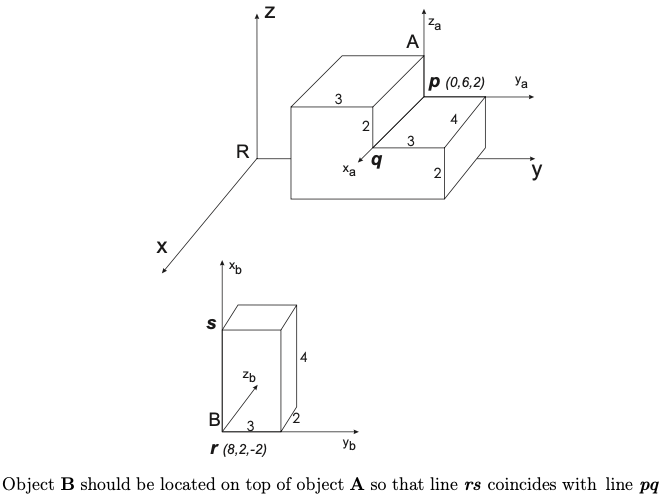

In [79]:
# 3D point, inhomogeneous coordinates
P = [1,2,3]
print(P)
# translation along X
P1 = np.add([1,0,0], P)
print(P1)
#rotation about X
P2 = SO3.Rx(1, unit='deg') * P1
P2

[1, 2, 3]
[2 2 3]


array([[2.        ],
       [1.94733817],
       [3.0344479 ]])

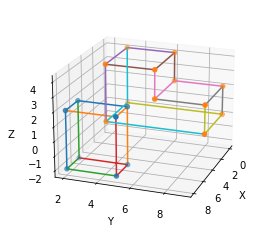

In [80]:
P = np.array([[8, 8, 8, 8, 6, 6, 6, 6], [2, 2, 5, 5, 2, 2, 5, 5], [-2, 2, -2, 2, -2, 2, -2, 2]])
Q = np.array([[4,4,4,4,4,4,0,0,0,0,0,0],[3,3,6,6,9,9,3,3,6,6,9,9],[0,4,4,2,2,0,0,4,4,2,2,0]])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
ax.view_init(elev=20, azim=20)

box2 = [[0,1,5,7], [1,3,7,6], [2,0,4,5], [3,2,6,4]]
box1 = [[0,1,7,8], [1,2,8,9], [2,3,9,10], [3,4,10,11],[4,5,11,6],[5,0,6,7]]
# draw lines joining the vertices of P
ax.scatter(xs=P[0], ys=P[1], zs=P[2], s=20)  # draw vertices
for line in box2:
    ax.plot([P[0,i] for i in line], [P[1,i] for i in line], [P[2,i] for i in line])
# draw lines joining the vertices of Q
ax.scatter(xs=Q[0], ys=Q[1], zs=Q[2], s=20)  # draw vertices
for line in box1:
    ax.plot([Q[0,i] for i in line], [Q[1,i] for i in line], [Q[2,i] for i in line])
plt.show()

In [81]:
### WRITE THE TRANSFORMATIONS TO P ARRAY
P1 = P
#P1 = TTTTT * P

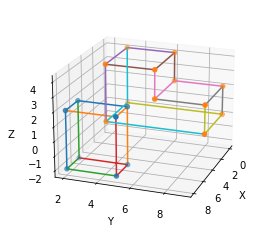

False


In [82]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
ax.view_init(elev=20, azim=20)

box2 = [[0,1,5,7], [1,3,7,6], [2,0,4,5], [3,2,6,4]]
box1 = [[0,1,7,8], [1,2,8,9], [2,3,9,10], [3,4,10,11],[4,5,11,6],[5,0,6,7]]
# draw lines joining the vertices of P
ax.scatter(xs=P1[0], ys=P1[1], zs=P1[2], s=20)  # draw vertices
for line in box2:
    ax.plot([P1[0,i] for i in line], [P1[1,i] for i in line], [P1[2,i] for i in line])
# draw lines joining the vertices of Q
ax.scatter(xs=Q[0], ys=Q[1], zs=Q[2], s=20)  # draw vertices
for line in box1:
    ax.plot([Q[0,i] for i in line], [Q[1,i] for i in line], [Q[2,i] for i in line])
plt.show()
rs = P[:,0:2]
pq = Q[:,[9,3]]
print (np.array_equal(rs,pq))